Scrip analyzing the mortgage interest rates in two scenarios: decreasing and equal rates.

In [11]:
import numpy as np
import numpy_financial as npf

payment_frequency = 12
interest_rate = 0.0675
mortgage_years = 30
mortgage_value = 200000

interest_rate /= payment_frequency
number_of_periods = mortgage_years * payment_frequency

In [9]:
periods = np.arange(1, number_of_periods+1, dtype=int)

In [18]:
interest_equal = -np.around(npf.ipmt(interest_rate,periods,number_of_periods,mortgage_value),2)

In [42]:
#np.set_printoptions(suppress=True)

#capital to be paid/month

principal_decreasing = np.around(np.zeros(number_of_periods)+(mortgage_value/number_of_periods),2)

In [44]:
balance = np.zeros(number_of_periods) + mortgage_value
balance_close = np.around(balance - np.cumsum(principal_decreasing), 2)
balance_open = balance_close + principal_decreasing
interest_decreasing = np.around(balance_open*interest_rate, 2)

In [61]:
f'Total interest value in the scenario with equal rates: {np.around(interest_equal.sum(),2)}'

'Total interest value in the scenario with equal rates: 266990.6'

In [55]:
f'Total interest value in the scenario with decreasing rates: {np.around(interest_decreasing.sum(),2)}'

'Total interest value in the scenario with decreasing rates: 203060.81'

In [64]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'cumulated rates value')

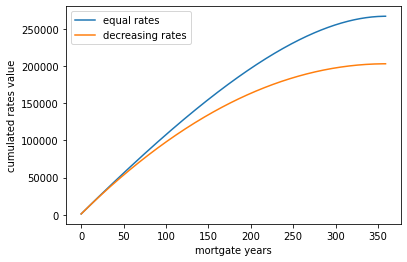

In [65]:
plt.plot(interest_equal.cumsum(),label='equal rates')
plt.plot(interest_decreasing.cumsum(),label='decreasing rates')
plt.legend()
plt.xlabel('mortgate years')
plt.ylabel('cumulated rates value')